# Introduction
The educational landscape today presents students with a multitude of challenges, both academic and personal, that can contribute to significant levels of stress. This stress can manifest in various ways, negatively impacting a student's mental and physical health, academic performance, and overall well-being. Research suggests a strong link between stress and student outcomes, with studies highlighting increased anxiety, depression, sleep disturbances, and even substance abuse in stressed students .

Despite its prevalence, student stress remains a multifaceted issue. Contributing factors range from academic pressures like exams and deadlines to personal challenges like financial worries, social anxieties, or relationship issues. The complex interplay between these factors makes it difficult to fully understand how stress manifests in individual students.

This study aims to delve deeper into the world of student stress by leveraging the power of data analysis. Through Exploratory Data Analysis (EDA), we will unearth patterns and relationships within student data that might be linked to stress levels. By identifying these underlying factors, we can gain valuable insights into the "why" behind student stress.

Furthermore, this research will explore the development of a predictive model. This model, trained on the analyzed data, could potentially anticipate when students are at risk of experiencing high stress levels. This predictive capability would be instrumental in creating targeted interventions and support systems that proactively address student well-being and foster academic success.

# LIBRARY REQUIRED

In [ ]:
pip install pandas

In [ ]:
pip install numpy


In [ ]:
pip install matplotlib


In [ ]:
pip install seaborn

In [ ]:
pip install sklearn

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


# About Dataset


📊 Student Attitude and Behavior Dataset 🎓
This dataset contains information collected from university students through a Google form. It includes details such as certification courses, gender, department, height (in cm), weight (in kg), marks in 10th and 12th grade, college marks, hobbies, daily studying time, preferred study environment, salary expectations, satisfaction with their degree, willingness to pursue a career related to their degree, social media and video usage, traveling time, stress levels, and financial status. The dataset aims to provide insights into student behavior and can be used for analysis and research purposes.

**Column Descriptions:**



1.  Certification Course: Indicates whether the student has completed any certification course or not. ✅
2.   Gender: The gender of the student. 🚻

1.   Department: The department or field of study the student is enrolled in. 📚
2.   Height (CM): The height of the student in centimeters. 📏

1.   Weight (KG): The weight of the student in kilograms. ⚖️
2.   10th Mark: The student's marks obtained in the 10th grade. 📝

1.   12th Mark: The student's marks obtained in the 12th grade. 🎓

1.   College Mark: The student's marks obtained in their college or university. 🏫
2.   Hobbies: The hobbies or interests of the student. 🎨

2.   Daily Studying Time: The amount of time the student spends studying on a daily basis. ⏰

1.   Prefer to Study in: The preferred study environment or location of the student. 📚🌳
2.   Salary Expectation: The student's expectation for their future salary. 💰
Do you like your degree?: The student's

1.   opinion on whether they like their degree or not. 👍👎
2.   Willingness to pursue a career based on their degree: The student's willingness to pursue a career related to their degree. 🏢

1.   Social Media & Video: The student's engagement with social media and video platforms. 📱📺

1.   Traveling Time: The time it takes for the student to commute or travel to their educational institution. 🚗
2.   Stress Level: The perceived stress level of the student. 😓
Financial Status:

2.   Financial Status: The financial status or economic background of the student. 💵

1.   Part-time Job: Whether the student is engaged in a part-time job or not. 💼

## data collection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
df=pd.read_csv("/Student Attitude and Behavior.csv") # Here add dataset
df.head()

,Certification Course,Gender,Department,Height(CM),Weight(KG),10th Mark,12th Mark,college mark,hobbies,daily studing time,prefer to study in,salary expectation,Do you like your degree?,willingness to pursue a career based on their degree,social medai & video,Travelling Time,Stress Level,Financial Status,part-time job
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


# Data Transformation


## Renaming the columns

In [ ]:
df.rename(columns={"Certification Course":"certification","Gender":"gender",
                   "Department":"dep","Height(CM)":"height","Weight(KG)":"weight",
                   "10th Mark":"mark10th","12th Mark":"mark12th","college mark":"collegemark",
                   "daily studing time":"studytime","prefer to study in":"prefertime","salary expectation":"salexpect",
                   "Do you like your degree?":"likedegree","willingness to pursue a career based on their degree  ":"carrer_willing",
                   "social medai & video":"smtime","Travelling Time ":"travel","Stress Level ":"stress","Financial Status":"financial",
                   "part-time job":"parttime"
                  },inplace=True)
df.head()

,certification,gender,dep,height,weight,mark10th,mark12th,collegemark,hobbies,studytime,prefertime,salexpect,likedegree,carrer_willing,smtime,travel,stress,financial,parttime
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   certification   235 non-null    object 
 1   gender          235 non-null    object 
 2   dep             235 non-null    object 
 3   height          235 non-null    float64
 4   weight          235 non-null    float64
 5   mark10th        235 non-null    float64
 6   mark12th        235 non-null    float64
 7   collegemark     235 non-null    float64
 8   hobbies         235 non-null    object 
 9   studytime       235 non-null    object 
 10  prefertime      235 non-null    object 
 11  salexpect       235 non-null    int64  
 12  likedegree      235 non-null    object 
 13  carrer_willing  235 non-null    object 
 14  smtime          235 non-null    object 
 15  travel          235 non-null    object 
 16  stress          235 non-null    object 
 17  financial       235 non-null    obj

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.head()

,certification,gender,dep,height,weight,mark10th,mark12th,collegemark,hobbies,studytime,prefertime,salexpect,likedegree,carrer_willing,smtime,travel,stress,financial,parttime
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,0 - 30 minute,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,30 - 60 minute,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,1 - 2 Hour,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,1 - 2 Hour,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,30 - 60 minute,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


## Studytime
Here have created a fuction and it extracts the hours/minutes and return average \ This also coverts hours into minutes

In [ ]:
df["studytime"].unique()

array(['0 - 30 minute', '30 - 60 minute', '1 - 2 Hour', '2 - 3 hour',
       '3 - 4 hour', 'More Than 4 hour'], dtype=object)

In [ ]:
def studyTime(x):
    x=x.split()
    time =[]
    for i in x:
        if i.isnumeric():
            time.append(int(i))
    if len(time) == 1:
        return time[0]*60
    elif len(time) == 2 and (("Hour" in x) or ("hour" in x)):
        return ((time[0]*60 + time[1]*60)/2)
    elif len(time) == 2:
        return (sum(time)/len(time))

In [ ]:
df["studytime"]=df["studytime"].apply(studyTime)
df.head()

,certification,gender,dep,height,weight,mark10th,mark12th,collegemark,hobbies,studytime,prefertime,salexpect,likedegree,carrer_willing,smtime,travel,stress,financial,parttime
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,15.0,Morning,40000,No,50%,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,45.0,Morning,15000,Yes,75%,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,90.0,Anytime,13000,Yes,50%,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,90.0,Anytime,1500000,No,50%,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,45.0,Morning,50000,Yes,25%,1.30 - 2 hour,30 - 60 minutes,Good,good,No


## carrer_willing

here i have removed the % sign and changed the datatype to float

In [ ]:
df["carrer_willing"] = df["carrer_willing"].str.replace("%","")
df["carrer_willing"] = df["carrer_willing"].astype("float")
df.head()

,certification,gender,dep,height,weight,mark10th,mark12th,collegemark,hobbies,studytime,prefertime,salexpect,likedegree,carrer_willing,smtime,travel,stress,financial,parttime
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,15.0,Morning,40000,No,50.0,1.30 - 2 hour,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,45.0,Morning,15000,Yes,75.0,1 - 1.30 hour,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,90.0,Anytime,13000,Yes,50.0,More than 2 hour,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,90.0,Anytime,1500000,No,50.0,1.30 - 2 hour,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,45.0,Morning,50000,Yes,25.0,1.30 - 2 hour,30 - 60 minutes,Good,good,No


## smtime

here i have just updated the same function and it does the job

In [ ]:
# smtime
df["smtime"].unique()

array(['1.30 - 2 hour', '1 - 1.30 hour', 'More than 2 hour',
       '30 - 60 Minute', '1 - 30 Minute', '0 Minute'], dtype=object)

In [ ]:
def socialTime(x):
    x=x.split()
    time =[]
    for i in x:
        try:
            time.append(float(i))
        except ValueError:
            pass
    if len(time) == 1:
        return time[0]*60
    elif len(time) == 2 and (("Hour" in x) or ("hour" in x)):
        return (((time[0]*60) + (time[1]*60))/2)
    elif len(time) == 2:
        return (sum(time)/len(time))

In [ ]:
df["smtime"] = df["smtime"].apply(socialTime)
df.head()

,certification,gender,dep,height,weight,mark10th,mark12th,collegemark,hobbies,studytime,prefertime,salexpect,likedegree,carrer_willing,smtime,travel,stress,financial,parttime
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,15.0,Morning,40000,No,50.0,99.0,30 - 60 minutes,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,45.0,Morning,15000,Yes,75.0,69.0,0 - 30 minutes,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,90.0,Anytime,13000,Yes,50.0,120.0,30 - 60 minutes,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,90.0,Anytime,1500000,No,50.0,99.0,0 - 30 minutes,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,45.0,Morning,50000,Yes,25.0,99.0,30 - 60 minutes,Good,good,No


## travel_time

In [ ]:
df["travel"].unique()

array(['30 - 60 minutes', '0 - 30 minutes', '1 - 1.30 hour',
       '2 - 2.30 hour', '1.30 - 2 hour', 'more than 3 hour',
       '2.30 - 3 hour'], dtype=object)

In [ ]:
df["travel"]=df["travel"].apply(socialTime)
df.head()

,certification,gender,dep,height,weight,mark10th,mark12th,collegemark,hobbies,studytime,prefertime,salexpect,likedegree,carrer_willing,smtime,travel,stress,financial,parttime
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,15.0,Morning,40000,No,50.0,99.0,45.0,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,45.0,Morning,15000,Yes,75.0,69.0,15.0,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,90.0,Anytime,13000,Yes,50.0,120.0,45.0,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,90.0,Anytime,1500000,No,50.0,99.0,15.0,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,45.0,Morning,50000,Yes,25.0,99.0,45.0,Good,good,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   certification   235 non-null    object 
 1   gender          235 non-null    object 
 2   dep             235 non-null    object 
 3   height          235 non-null    float64
 4   weight          235 non-null    float64
 5   mark10th        235 non-null    float64
 6   mark12th        235 non-null    float64
 7   collegemark     235 non-null    float64
 8   hobbies         235 non-null    object 
 9   studytime       235 non-null    float64
 10  prefertime      235 non-null    object 
 11  salexpect       235 non-null    int64  
 12  likedegree      235 non-null    object 
 13  carrer_willing  235 non-null    float64
 14  smtime          235 non-null    float64
 15  travel          235 non-null    float64
 16  stress          235 non-null    object 
 17  financial       235 non-null    obj

Data Preprocessing Complete: Ready for Exploratory Data Analysis (EDA)

# EDA(Exploratory Data Analysis)

In [ ]:
df.head()

,certification,gender,dep,height,weight,mark10th,mark12th,collegemark,hobbies,studytime,prefertime,salexpect,likedegree,carrer_willing,smtime,travel,stress,financial,parttime
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,15.0,Morning,40000,No,50.0,99.0,45.0,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,45.0,Morning,15000,Yes,75.0,69.0,15.0,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,90.0,Anytime,13000,Yes,50.0,120.0,45.0,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,90.0,Anytime,1500000,No,50.0,99.0,15.0,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,45.0,Morning,50000,Yes,25.0,99.0,45.0,Good,good,No


## certification






<Axes: xlabel='certification'>

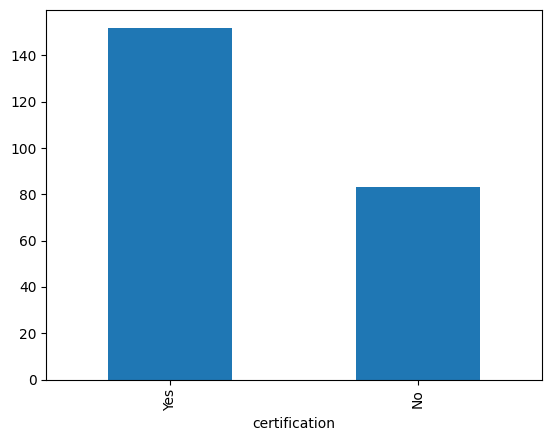

In [ ]:
df["certification"].value_counts().plot(kind="bar")

## gender


<Axes: xlabel='gender'>

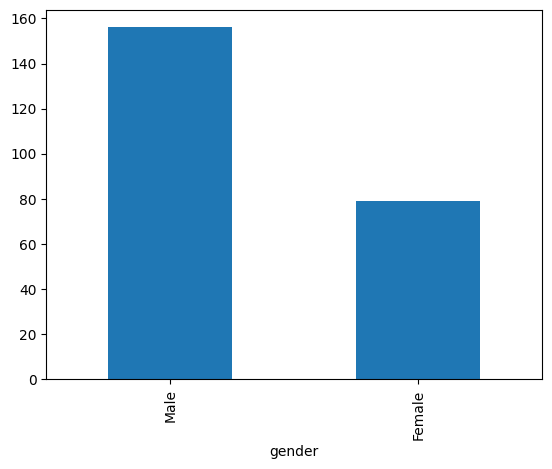

In [ ]:
df["gender"].value_counts().plot(kind='bar')

##Gender vs certification




<Axes: xlabel='gender,certification'>

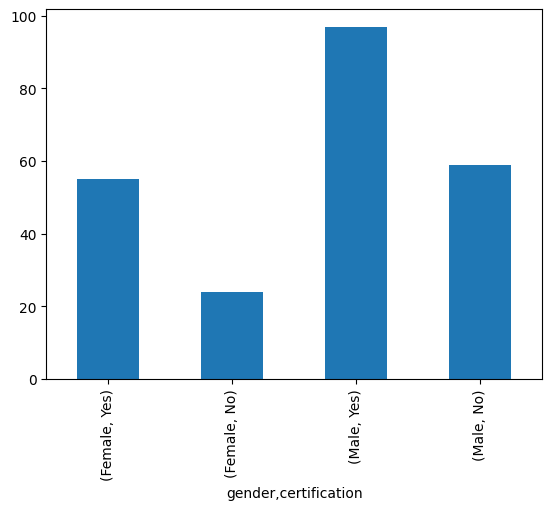

In [ ]:
df.groupby("gender").certification.value_counts().plot(kind="bar")

## Department

In [ ]:
# Department
df["dep"].value_counts()

dep
BCA                              132
Commerce                          60
B.com ISM                         28
B.com Accounting and Finance      15
Name: count, dtype: int64

<Axes: xlabel='dep'>

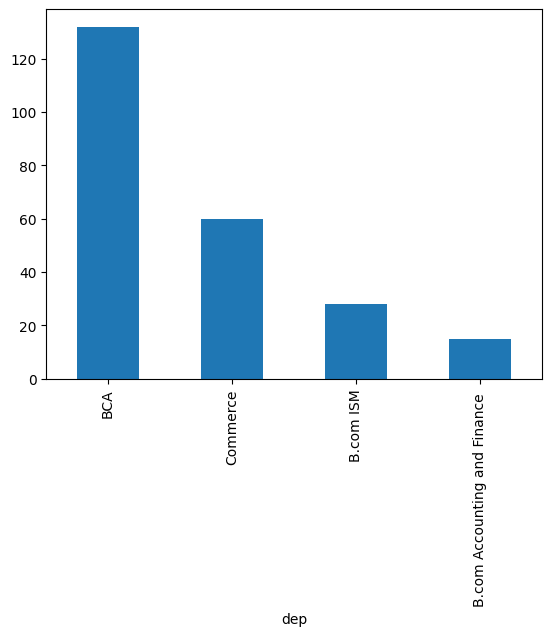

In [ ]:
df["dep"].value_counts().plot(kind='bar')

## department vs gender

<Axes: xlabel='dep,gender'>

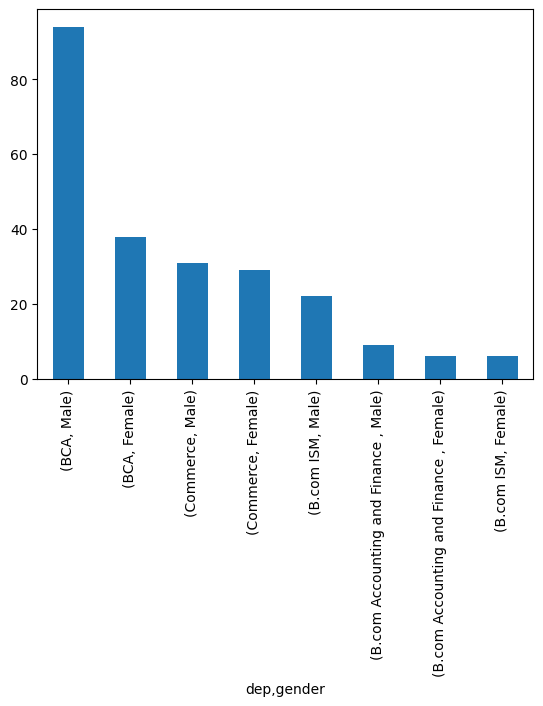

In [ ]:
df.groupby('dep').gender.value_counts().sort_values(ascending=False).plot(kind="bar")

## Key Finding

Most of the male prefer BCA over B.com as there are NO males who are pursuing B.com

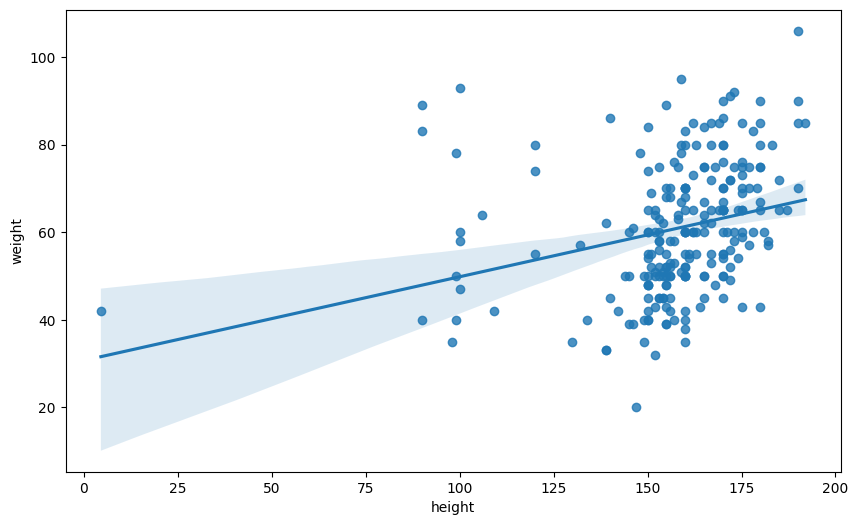

In [ ]:
plt.figure(figsize=(10,6))
sns.regplot(x=df["height"],y=df["weight"])
plt.show()

<Axes: xlabel='gender'>

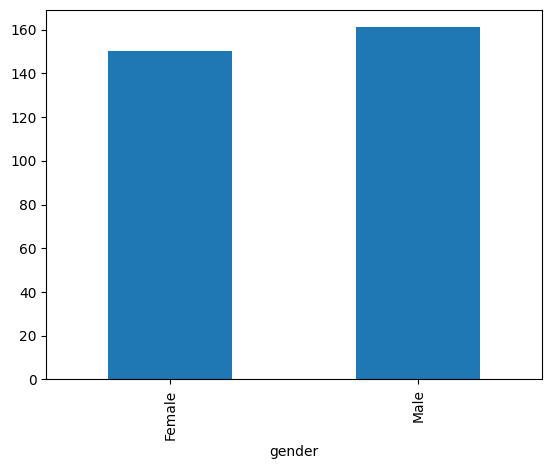

In [ ]:
df.groupby("gender").height.mean().plot(kind='bar')
# Males are taller than females how cool is that haha

<Axes: xlabel='gender'>

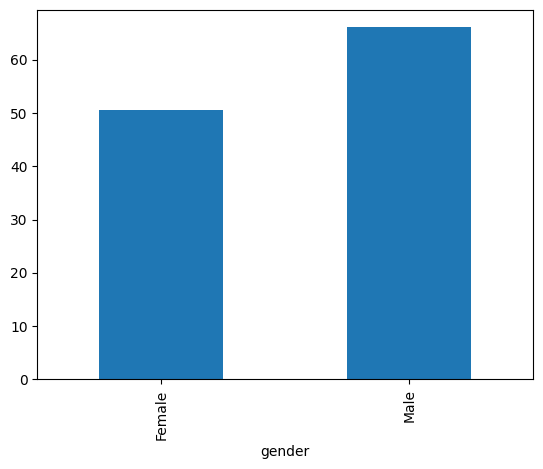

In [ ]:
df.groupby("gender").weight.mean().plot(kind="bar")
# males have more weight than females that is also interesting

## Marks 10th , 12th , college

In [ ]:
# 10th marks
df["mark10th"].describe()

count    235.000000
mean      76.848511
std       13.047560
min        7.400000
25%       70.000000
50%       80.000000
75%       86.250000
max       98.000000
Name: mark10th, dtype: float64

<Axes: >

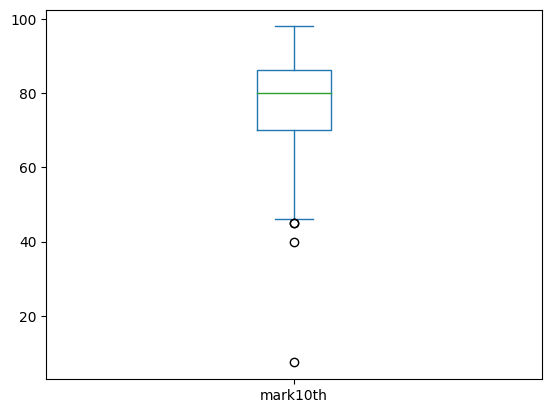

In [ ]:
df["mark10th"].plot(kind="box")
# That one outlier got somewhere close to 5 marks very bad i bet that would be a male let's check

Checking if that person with 7.40 marks is a male of a female

In [ ]:
df.groupby("gender").mark10th.min()

gender
Female     7.4
Male      40.0
Name: mark10th, dtype: float64

In [ ]:
df["mark12th"].describe()

count    235.000000
mean      68.775872
std       11.018192
min       45.000000
25%       60.000000
50%       69.000000
75%       76.000000
max       94.000000
Name: mark12th, dtype: float64

<Axes: ylabel='Density'>

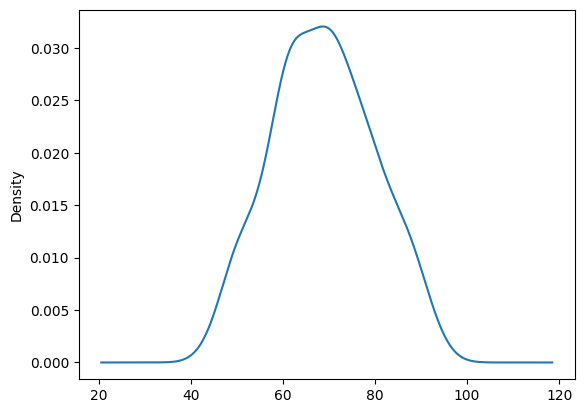

In [ ]:
df["mark12th"].plot(kind="kde")

In [ ]:
df['collegemark'].describe()

count    235.000000
mean      70.660553
std       15.727446
min        1.000000
25%       60.000000
50%       70.000000
75%       80.000000
max      100.000000
Name: collegemark, dtype: float64

<Axes: ylabel='Density'>

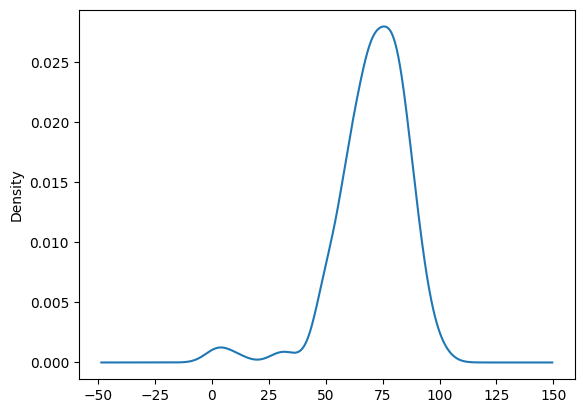

In [ ]:
df['collegemark'].plot(kind='kde')

## hobbies

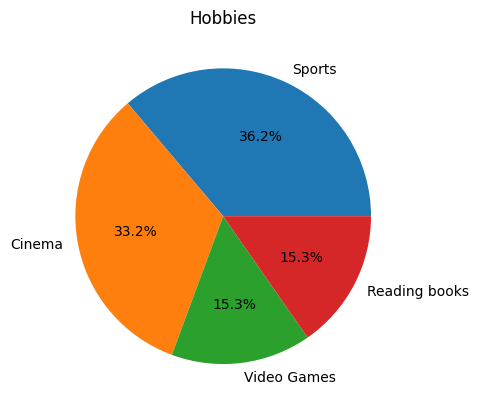

In [ ]:
df["hobbies"].value_counts().plot(kind="pie", autopct='%1.1f%%',title="Hobbies",ylabel="")
plt.show()

## Hobbies vs gender

<Axes: >

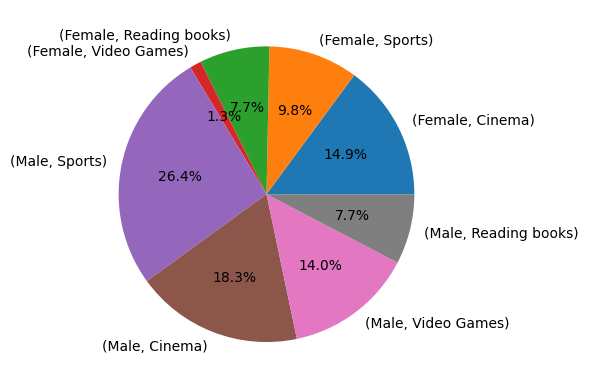

In [ ]:
hobbies_percentage = df.groupby('gender').hobbies.value_counts()
hobbies_percentage.plot(kind='pie',autopct='%1.1f%%',ylabel="")

## Study Time

In [ ]:
df["studytime"].describe()

count    235.000000
mean      78.702128
std       61.156208
min       15.000000
25%       45.000000
50%       45.000000
75%       90.000000
max      240.000000
Name: studytime, dtype: float64

<Axes: >

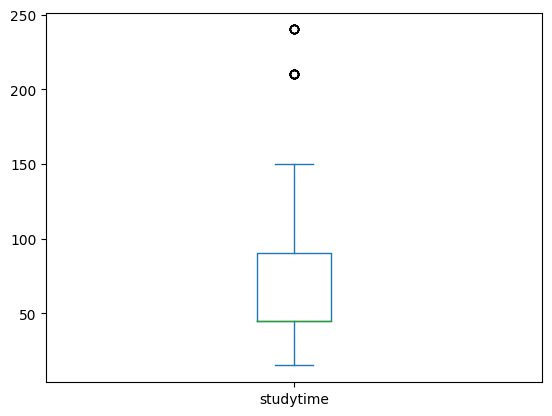

In [ ]:
df["studytime"].plot(kind="box")

In [ ]:
df.groupby('gender').studytime.mean()
# Females study more than males

gender
Female    92.658228
Male      71.634615
Name: studytime, dtype: float64

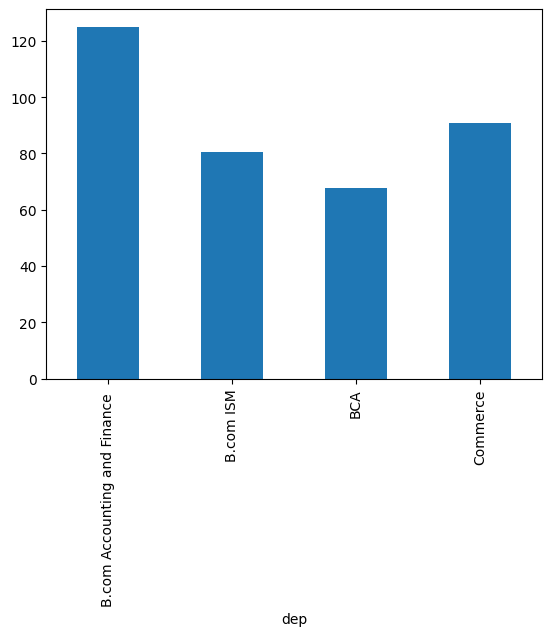

In [ ]:
df.groupby('dep').studytime.mean().plot(kind='bar')
plt.show()
# students who have B.com accounting and finance study more

### Preferd time of study

In [ ]:
df["prefertime"].value_counts()

prefertime
Anytime    111
Morning     77
Night       47
Name: count, dtype: int64

<Axes: xlabel='dep,prefertime'>

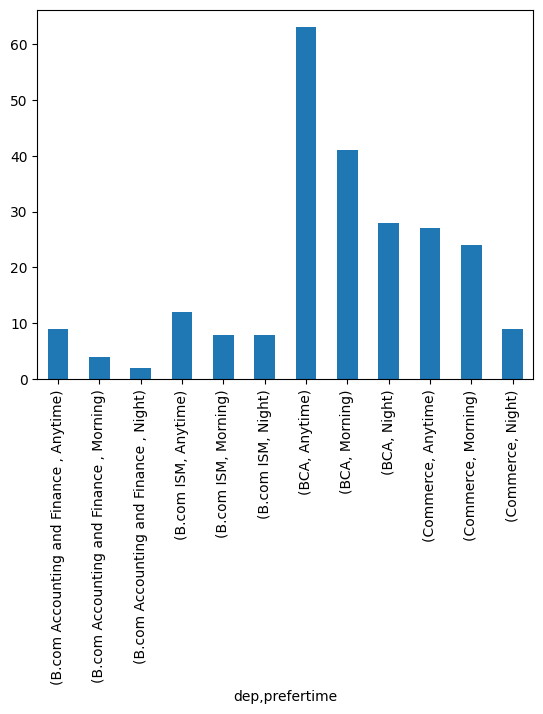

In [ ]:
df.groupby('dep').prefertime.value_counts().plot(kind="bar")

In [ ]:
df.head()

,certification,gender,dep,height,weight,mark10th,mark12th,collegemark,hobbies,studytime,prefertime,salexpect,likedegree,carrer_willing,smtime,travel,stress,financial,parttime
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,15.0,Morning,40000,No,50.0,99.0,45.0,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,45.0,Morning,15000,Yes,75.0,69.0,15.0,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,90.0,Anytime,13000,Yes,50.0,120.0,45.0,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,90.0,Anytime,1500000,No,50.0,99.0,15.0,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,45.0,Morning,50000,Yes,25.0,99.0,45.0,Good,good,No


## salary expectations

In [ ]:
df["salexpect"].describe()

count    2.350000e+02
mean     3.248168e+04
std      1.113146e+05
min      0.000000e+00
25%      1.500000e+04
50%      2.000000e+04
75%      2.500000e+04
max      1.500000e+06
Name: salexpect, dtype: float64

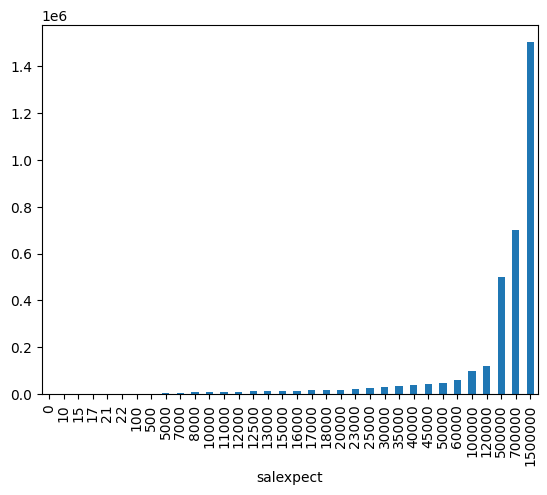

In [ ]:
df.groupby('salexpect').salexpect.mean().plot(kind='bar')
plt.show()

## Student Like there Degree or no

<Axes: xlabel='likedegree'>

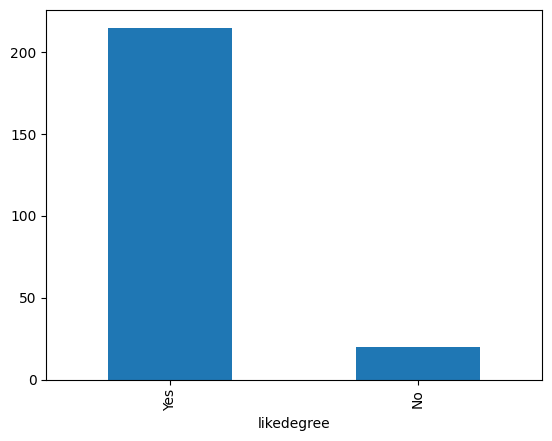

In [ ]:
df["likedegree"].value_counts().plot(kind='bar')
# Most of the students like there degree

## SOCIAL MEDIA TIME(smtime)

In [ ]:
df["smtime"].describe()

count    235.000000
mean      60.176596
std       35.040357
min        0.000000
25%       45.000000
50%       45.000000
75%       84.000000
max      120.000000
Name: smtime, dtype: float64

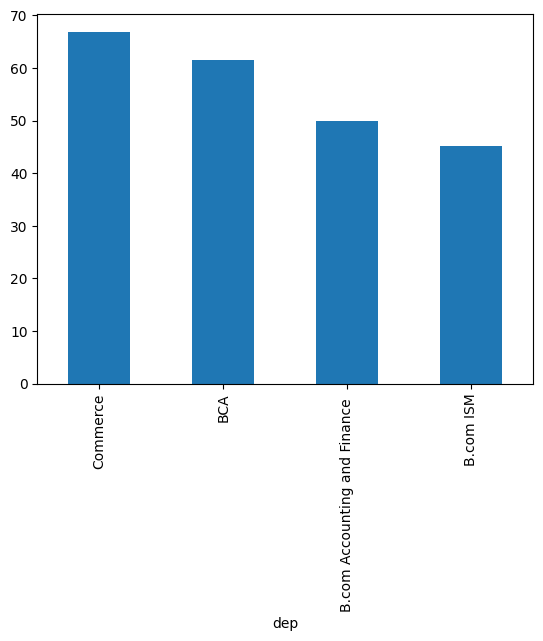

In [ ]:
df.groupby('dep').smtime.mean().sort_values(ascending=False).plot(kind='bar')
plt.show()
# commerce students use social media the most

## Travel Time

In [ ]:
df['travel'].describe()

count    235.000000
mean      61.468085
std       43.345093
min       15.000000
25%       45.000000
50%       45.000000
75%       69.000000
max      180.000000
Name: travel, dtype: float64

<Axes: ylabel='Density'>

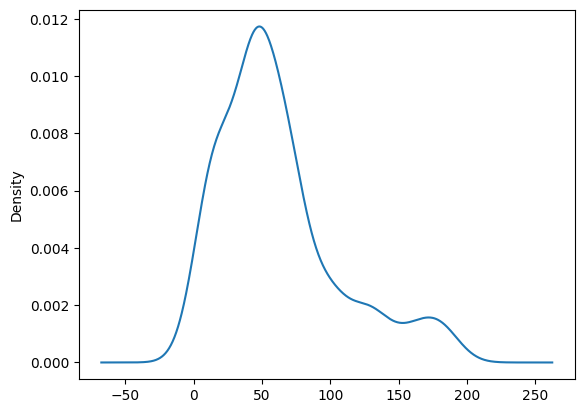

In [ ]:
df["travel"].plot(kind="kde")

# STRESS ANALYSIS

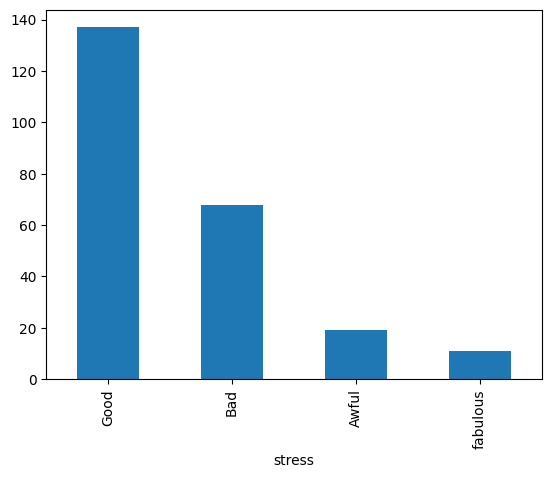

In [ ]:
df['stress'].value_counts().plot(kind='bar')
plt.show()
# most of the students have good stress level

<Axes: title={'center': 'Stress & Gender'}>

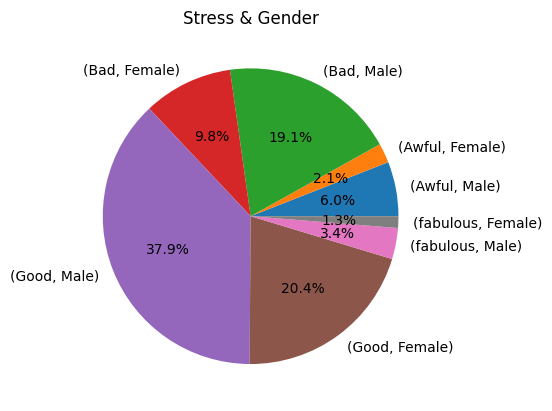

In [ ]:
# Stress vs gender
df.groupby("stress").gender.value_counts().plot(kind='pie',autopct="%1.1f%%",ylabel="",title="Stress & Gender")

In [ ]:
# Stress vs department
stress_dep = df.groupby("dep").stress.value_counts().reset_index().sort_values(by="count")
stress_dep

,dep,stress,count
2,B.com Accounting and Finance,Awful,2
3,B.com Accounting and Finance,fabulous,2
6,B.com ISM,Awful,2
7,B.com ISM,fabulous,2
11,BCA,fabulous,3
1,B.com Accounting and Finance,Bad,4
15,Commerce,fabulous,4
14,Commerce,Awful,5
0,B.com Accounting and Finance,Good,7
10,BCA,Awful,10


In [ ]:
df.head()

,certification,gender,dep,height,weight,mark10th,mark12th,collegemark,hobbies,studytime,prefertime,salexpect,likedegree,carrer_willing,smtime,travel,stress,financial,parttime
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,15.0,Morning,40000,No,50.0,99.0,45.0,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,45.0,Morning,15000,Yes,75.0,69.0,15.0,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,90.0,Anytime,13000,Yes,50.0,120.0,45.0,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,90.0,Anytime,1500000,No,50.0,99.0,15.0,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,45.0,Morning,50000,Yes,25.0,99.0,45.0,Good,good,No


In [ ]:
# Fincancial and Stress
df["financial"].value_counts()

financial
good        129
Bad          88
Awful        14
Fabulous      4
Name: count, dtype: int64

<Axes: xlabel='financial,stress'>

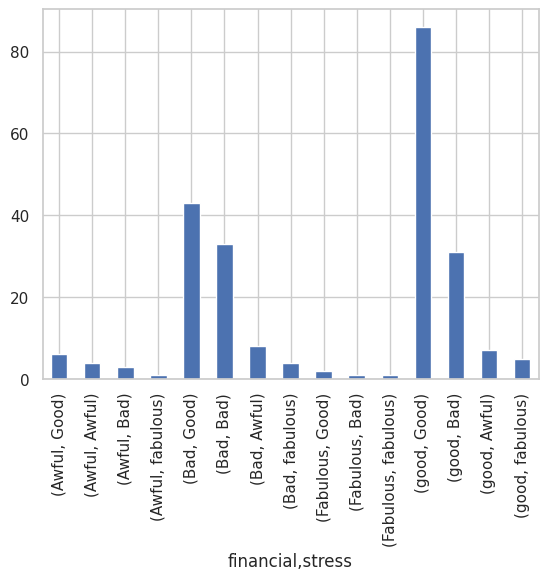

In [ ]:
df.groupby("financial").stress.value_counts().plot(kind='bar')

In [ ]:
# part time and stress
df["parttime"].value_counts()

parttime
No     194
Yes     41
Name: count, dtype: int64

<Axes: xlabel='parttime,stress'>

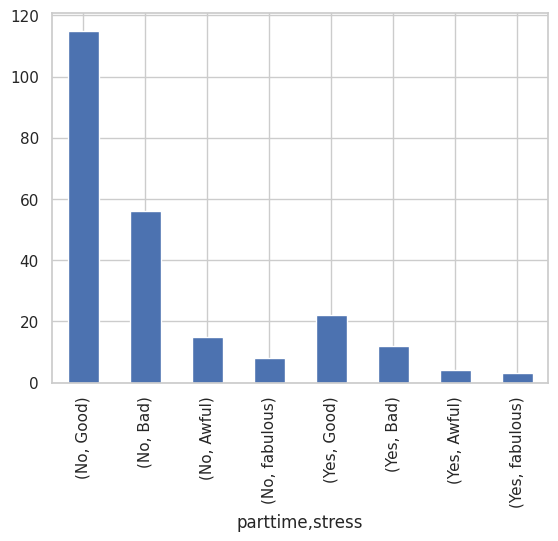

In [ ]:
df.groupby("parttime").stress.value_counts().plot(kind="bar")

Students with part-time jobs tend to have a better financial situation compared to students who do not hold part-time jobs.

# MODEL BULIDING AND EVALUATION
NOTE : This dataset exhibits a significant class imbalance, with a very limited number of data points overall. Consequently, the presented model serves as a conceptual illustration of classification techniques applicable to such datasets. It is important to acknowledge that the accuracy of this model may not be representative due to the data constraints.

In [ ]:
df.head()

,certification,gender,dep,height,weight,mark10th,mark12th,collegemark,hobbies,studytime,prefertime,salexpect,likedegree,carrer_willing,smtime,travel,stress,financial,parttime
0,No,Male,BCA,100.0,58.0,79.0,64.0,80.0,Video Games,15.0,Morning,40000,No,50.0,99.0,45.0,Bad,Bad,No
1,No,Female,BCA,90.0,40.0,70.0,80.0,70.0,Cinema,45.0,Morning,15000,Yes,75.0,69.0,15.0,Bad,Bad,No
2,Yes,Male,BCA,159.0,78.0,71.0,61.0,55.0,Cinema,90.0,Anytime,13000,Yes,50.0,120.0,45.0,Awful,Bad,No
3,Yes,Female,BCA,147.0,20.0,70.0,59.0,58.0,Reading books,90.0,Anytime,1500000,No,50.0,99.0,15.0,Bad,good,No
4,No,Male,BCA,170.0,54.0,40.0,65.0,30.0,Video Games,45.0,Morning,50000,Yes,25.0,99.0,45.0,Good,good,No


In [ ]:
df["stress"].unique()

array(['Bad', 'Awful', 'Good', 'fabulous'], dtype=object)

In [ ]:
ordinal_mapping = {'Awful': 0, 'Bad': 1, 'Good': 2, 'fabulous': 3}

df['Stress'] = df['stress'].map(ordinal_mapping)

df = df.drop(['stress'], axis=1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

columns_to_encode = ['certification', 'gender', 'dep', 'hobbies', 'prefertime', 'likedegree', 'financial', 'parttime' ]

data_to_encode = df[columns_to_encode]

encoder = OneHotEncoder()

one_hot_encoded_data = encoder.fit_transform(data_to_encode)

column_names = encoder.get_feature_names_out(columns_to_encode)

one_hot_encoded_df = pd.DataFrame(one_hot_encoded_data.toarray(), columns=column_names)

df = df.drop(columns=columns_to_encode)

df = pd.concat([df, one_hot_encoded_df], axis=1)

In [ ]:
df.shape

(235, 34)

In [ ]:
df.head()

,height,weight,mark10th,mark12th,collegemark,studytime,salexpect,carrer_willing,smtime,travel,...,prefertime_Morning,prefertime_Night,likedegree_No,likedegree_Yes,financial_Awful,financial_Bad,financial_Fabulous,financial_good,parttime_No,parttime_Yes
0,100.0,58.0,79.0,64.0,80.0,15.0,40000,50.0,99.0,45.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,90.0,40.0,70.0,80.0,70.0,45.0,15000,75.0,69.0,15.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,159.0,78.0,71.0,61.0,55.0,90.0,13000,50.0,120.0,45.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,147.0,20.0,70.0,59.0,58.0,90.0,1500000,50.0,99.0,15.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,170.0,54.0,40.0,65.0,30.0,45.0,50000,25.0,99.0,45.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


normalizing the numerical columns

In [ ]:
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['height', 'weight', 'mark10th', 'mark12th', 'collegemark', 'studytime']

scaler = MinMaxScaler()

df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df['salexpect'] = scaler.fit_transform(df[['salexpect']])

In [ ]:
df.head()

,height,weight,mark10th,mark12th,collegemark,studytime,salexpect,carrer_willing,smtime,travel,...,prefertime_Morning,prefertime_Night,likedegree_No,likedegree_Yes,financial_Awful,financial_Bad,financial_Fabulous,financial_good,parttime_No,parttime_Yes
0,0.509333,0.441860,0.790287,0.387755,0.797980,0.000000,0.067685,50.0,99.0,45.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.456000,0.232558,0.690949,0.714286,0.696970,0.133333,-0.157383,75.0,69.0,15.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.824000,0.674419,0.701987,0.326531,0.545455,0.333333,-0.175388,50.0,120.0,45.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,0.760000,0.000000,0.690949,0.285714,0.575758,0.333333,13.211657,50.0,99.0,15.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,0.882667,0.395349,0.359823,0.408163,0.292929,0.133333,0.157713,25.0,99.0,45.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0


Logistic Regression Metrics:
Accuracy: 0.40
Recall: 0.40
F1-score: 0.45
R2 Score: -1.94



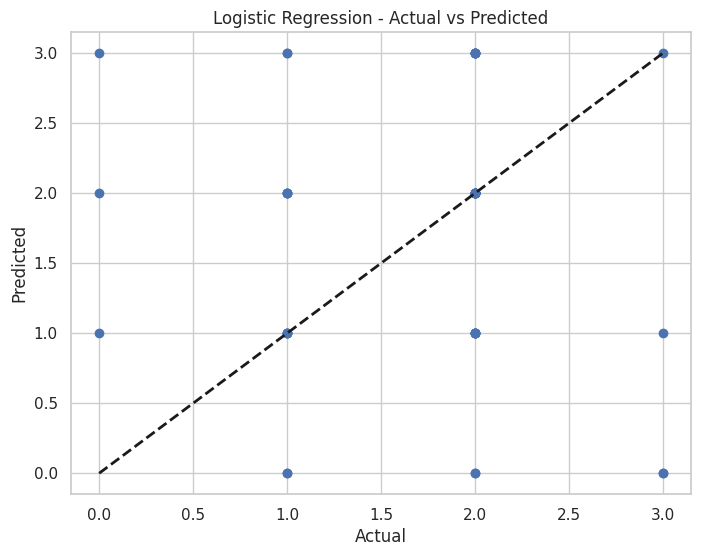

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Decision Tree Metrics:
Accuracy: 0.51
Recall: 0.51
F1-score: 0.51
R2 Score: -0.68



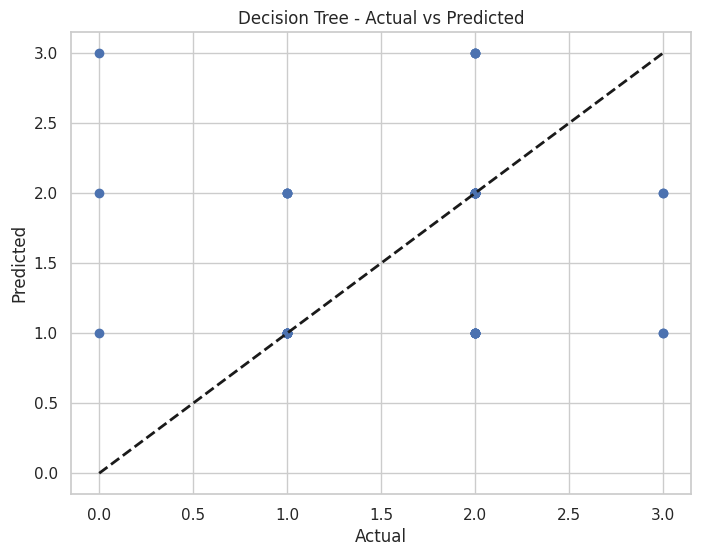

Random Forest Metrics:
Accuracy: 0.60
Recall: 0.60
F1-score: 0.58
R2 Score: -0.64



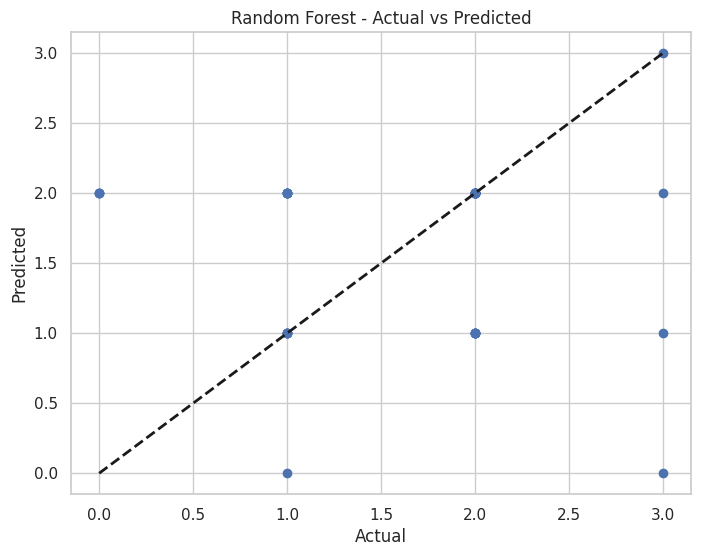

K Nearest Neighbors Metrics:
Accuracy: 0.28
Recall: 0.28
F1-score: 0.26
R2 Score: -2.02



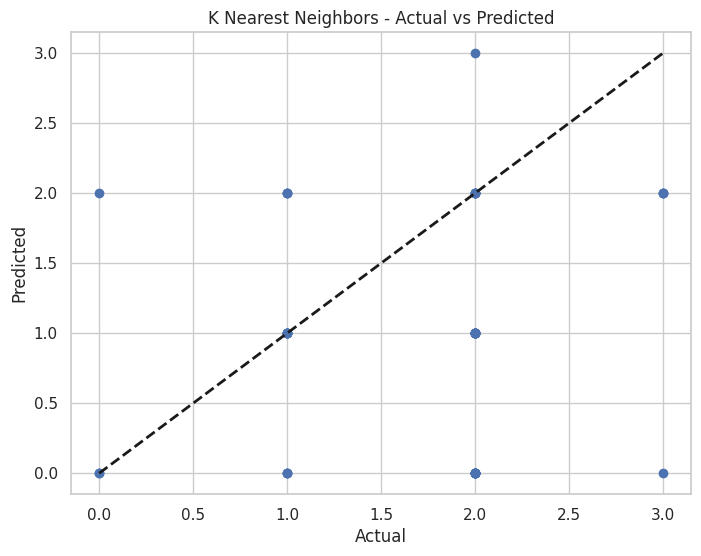

Support Vector Machine Metrics:
Accuracy: 0.30
Recall: 0.30
F1-score: 0.34
R2 Score: -2.36



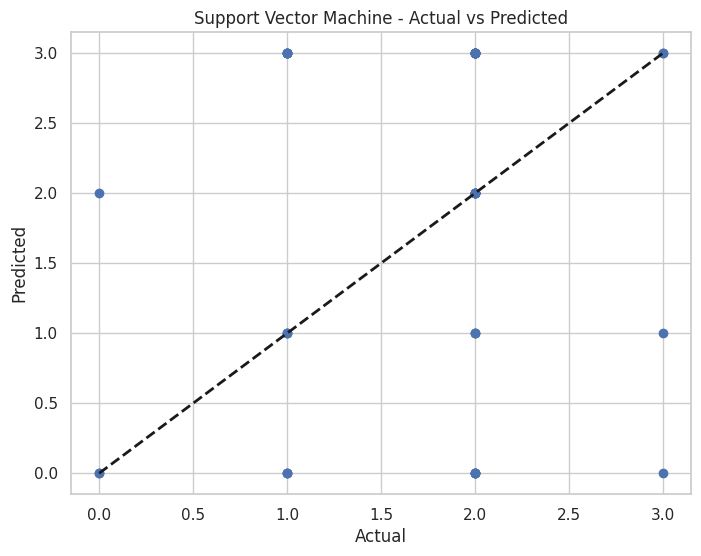

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Split the data into features and target
X = df.drop('Stress', axis=1)
y = df['Stress']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    clf.fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    r2 = r2_score(y_test, y_pred)
    print(f'{name} Metrics:')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1-score: {f1:.2f}')
    print(f'R2 Score: {r2:.2f}')
    print()

    # Plotting actual vs predicted
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)
    plt.xlabel('Actual')
    plt.ylabel('Predicted')
    plt.title(f'{name} - Actual vs Predicted')
    plt.show()

# Conclusion
Student stress is a prevalent issue with far-reaching consequences. This analysis highlights several key points:

*   Academic pressure is a major contributor to student stress, including workload, deadlines, and fear of failure.
*   Factors like financial strain, social issues, and personal problems can further exacerbate stress levels.
*   Unmanaged stress can negatively impact academic performance, mental health, and overall well-being.


Therefore, it is crucial to address student stress through a multi-pronged approach:

*   Institutions can implement measures to manage workload, provide academic support services, and foster a positive learning environment.
*   Students can develop stress-management techniques like time management, relaxation exercises, and seeking help from counselors.
*   Parents and guardians can offer understanding, open communication, and encouragement.


By working together, we can create a more supportive environment that empowers students to thrive and succeed while maintaining their mental and physical health.